# Python 数据可视化分析
# 介绍
# 在机器学习领域中，可视化是十分重要的。在开始一项新任务时，通过可视化手段探索数据能更好地帮助人们把握数据的要点。在分析模型表现和模型报告的结果时，可视化能使分析显得更加生动鲜明。有时候，为了理解复杂的模型，我们还可以将高维空间映射为视觉上更直观的二维或三维图形。

总而言之，可视化是一个相对快捷的从数据中挖掘信息的手段。本文将使用 Pandas、Matplotlib、seaborn 等流行的库，带你上手可视化。

知识点
单变量可视化的常用方法
多变量可视化的常用方法
t-SNE
数据集¶
首先使用 import 载入相关依赖。

首先使用 `import` 载入相关依赖。

In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('telecom_churn.csv')

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2F42CE648>,
      dtype=object)

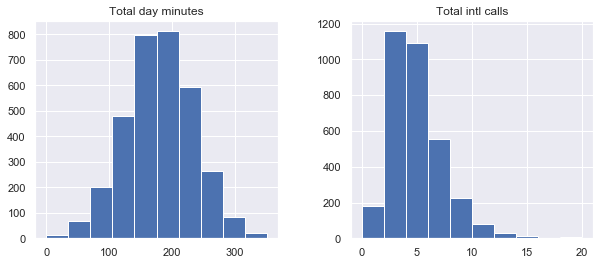

In [6]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2F4415948>,
      dtype=object)

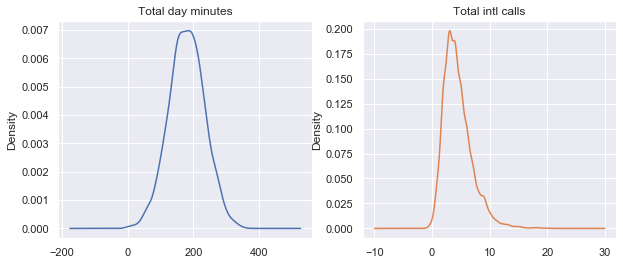

In [7]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4), legend=False, title=features)

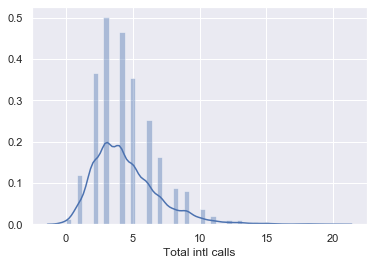

In [8]:
sns.distplot(df['Total intl calls'])

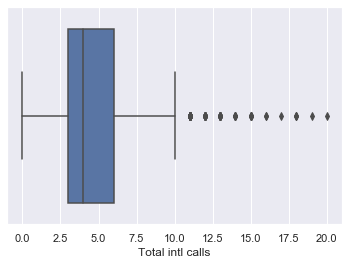

In [7]:
sns.boxplot(x='Total intl calls', data=df)

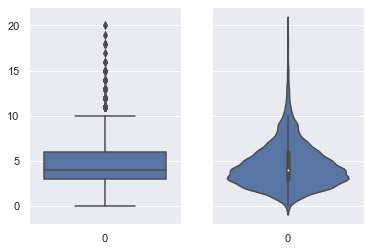

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

In [9]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [10]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

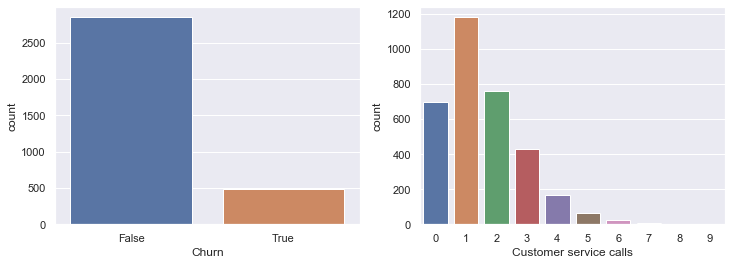

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

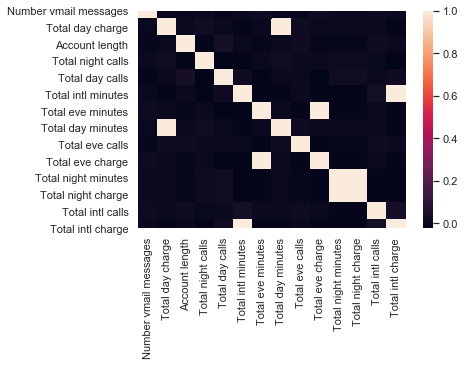

In [12]:
# 丢弃非数值变量
numerical = list(set(df.columns) -
                 set(['State', 'International plan', 'Voice mail plan',
                      'Area code', 'Churn', 'Customer service calls']))
# 计算和绘图
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [13]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 
                                       'Total night charge', 'Total intl charge']))

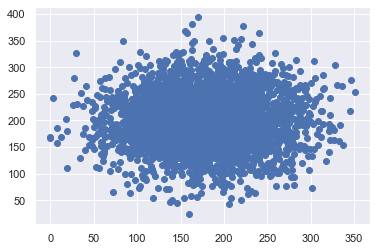

In [14]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

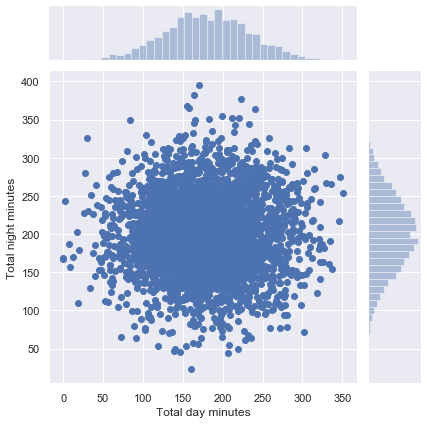

In [15]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter')

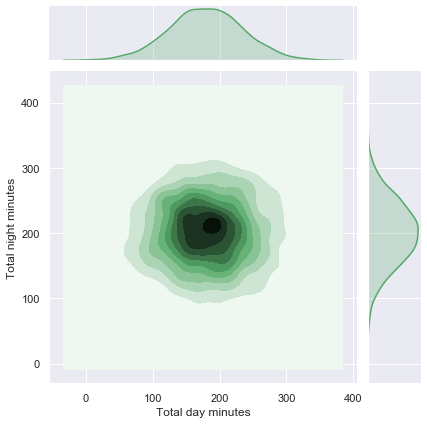

In [16]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g")

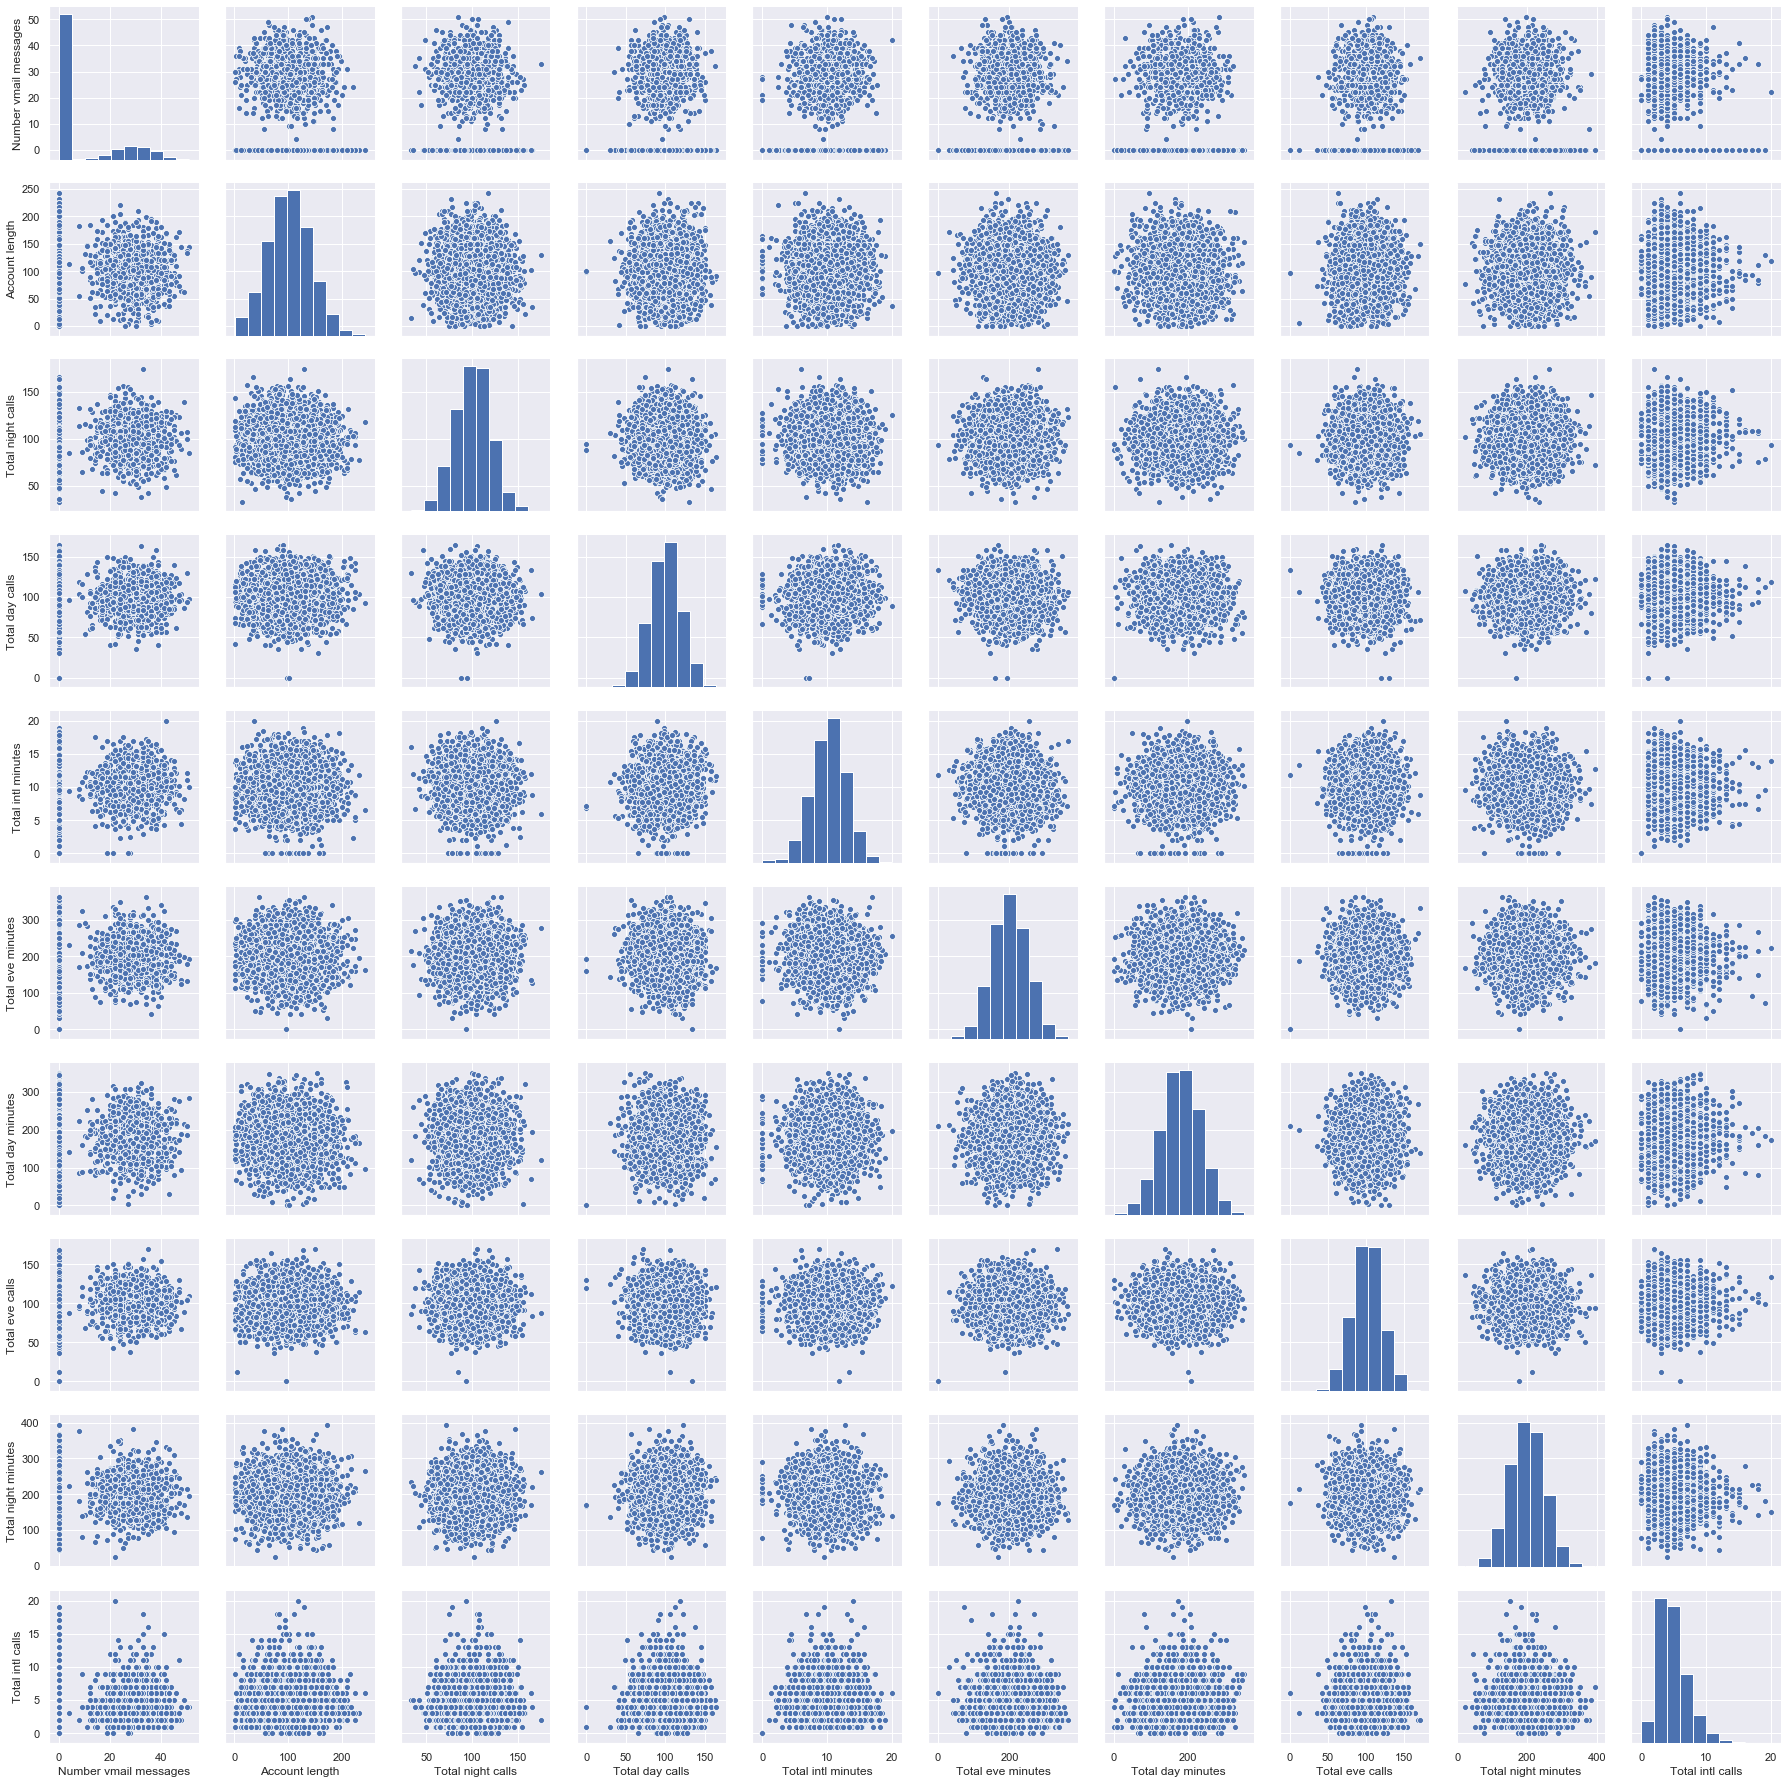

In [17]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

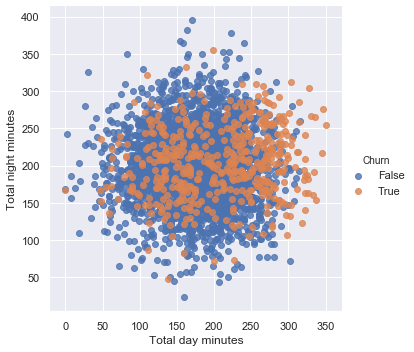

In [18]:
sns.lmplot('Total day minutes', 'Total night minutes',
           data=df, hue='Churn', fit_reg=False)

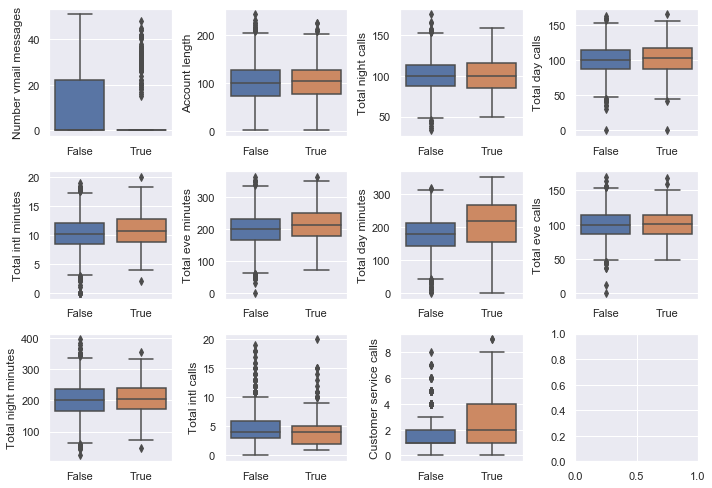

In [19]:
# 有时我们可以将有序变量作为数值变量分析
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

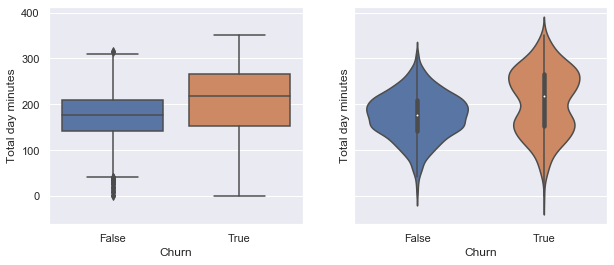

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

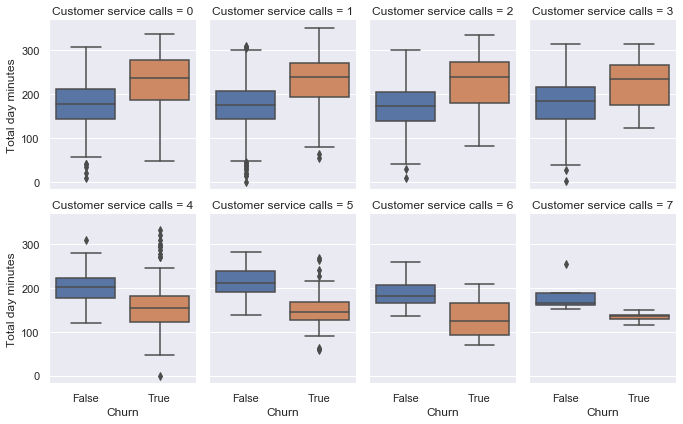

In [21]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
            data=df[df['Customer service calls'] < 8], kind="box",
            col_wrap=4, height=3, aspect=.8)

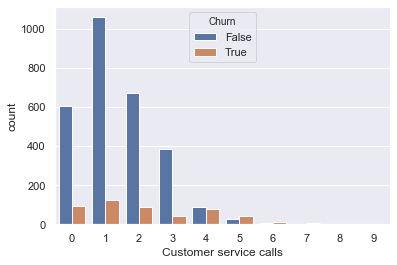

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

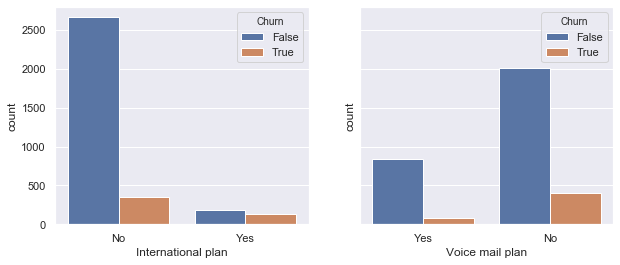

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

In [24]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [25]:
df.groupby(['State'])['Churn'].agg(
    [np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [27]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

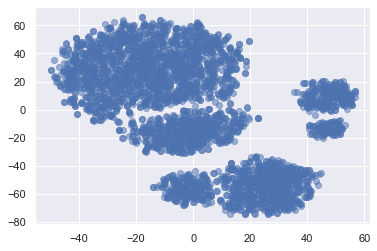

In [30]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

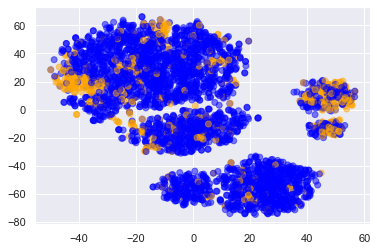

In [31]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5)

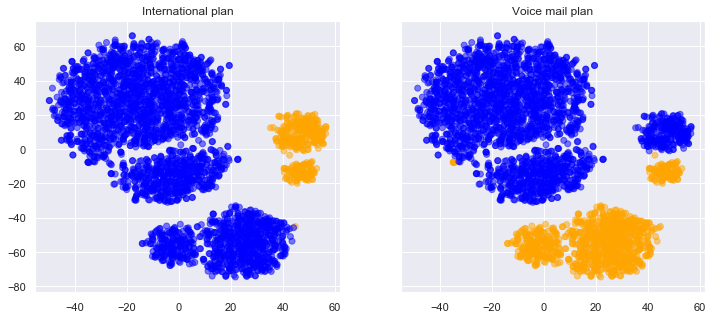

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5)
    axes[i].set_title(name)